In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
%matplotlib inline
# import from models folder
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../data'))
from thmodel import *

In [2]:
import pickle
# we want to load dict_data_final.pkl
with open('..\\data\\dict_data_final.pkl', 'rb') as f:
    dict_data = pickle.load(f)

In [3]:
P = [0.1, 0.5, 0.9]
C, p0 = 2, 0.5
inc = 1
n_it = 100

x, y = dict_data['Beneixama']

In [4]:
thmodel = Grid(x=x, y=y)
thmodel.initialize(inc=inc, part=P)
thmodel.compute_th_param()
thmodel.submatrix()
thmodel.enlargement_process()
thmodel.montecarlo(n_it=n_it)

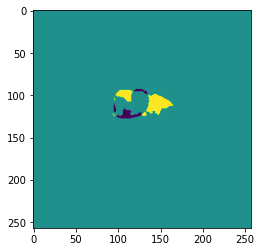

In [5]:
X = thmodel.X.clone().detach()
y_bin = torch.from_numpy(y).clone()

X_bin = torch.where(
    X == 0,
    0,
    1
)

y_bin = torch.where(
    y_bin == 0,
    0,
    1
)

misclass = (y_bin[:, :, -1] - X_bin[:, :, -1]).to(torch.float32)
plt.imshow(misclass)

# Train

In [13]:
Train(x=x, y=y, alpha=1., beta=1., gamma=1., epochs=5)

Epoch:  0
Loss:  6807.2158203125
Alpha:  1.100000023841858 Beta:  0.8999999761581421 Gamma:  0.8999999761581421
Epoch:  1
Loss:  4461.16552734375
Alpha:  1.2000000476837158 Beta:  0.7999999523162842 Gamma:  0.7999999523162842
Epoch:  2


KeyboardInterrupt: 

In [18]:
thmodel = Grid(x=x, y=y)
thmodel.initialize(inc=inc, part=P)
thmodel.compute_th_param(alpha=2, beta=0.1, gamma=0.1)
thmodel.submatrix()
thmodel.enlargement_process()
thmodel.montecarlo(n_it=n_it)

In [17]:
thmodel.div, thmodel.p0

(tensor([1.0006, 1.0006, 1.0006, 1.0006, 1.0005, 1.0005, 1.0005, 1.0005, 1.0005,
         1.0006, 1.0007, 1.0007, 1.0008, 1.0008, 1.0009, 1.0010, 1.0012]),
 tensor([0.9994, 0.9994, 0.9994, 0.9994, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995,
         0.9994, 0.9993, 0.9993, 0.9992, 0.9992, 0.9991, 0.9990, 0.9988]))

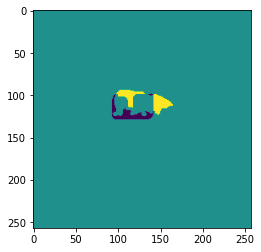

In [19]:
X = thmodel.X.clone().detach()
y_bin = torch.from_numpy(y).clone()

X_bin = torch.where(
    X == 0,
    0,
    1
)

y_bin = torch.where(
    y_bin == 0,
    0,
    1
)

misclass = (y_bin[:, :, -1] - X_bin[:, :, -1]).to(torch.float32)
plt.imshow(misclass)